# Assignment 1

<b> Name</b>: Lakshmi Biradar <br>
<b> Redid </b> : 825975651

In [1]:
path = 'search.xls' #path for the file

In [2]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plot
import timeit

start = timeit.default_timer()
df = pd.read_csv(path, dtype=object, sep="\t", header=1)

# define MW days and TTH days
Intro = ['150', '150L', '160', '160L']
MW_days = ['M', 'MW', 'W']
TTH_days = ['T', 'TTH', 'TH']

# Data pre-processing
df.columns = df.columns.str.replace(' ', '_').astype(str)
df['Suffix'] = df['Suffix'].fillna('')
df['Course_no_suffix'] = df['Course_#'] + df['Suffix']
df['Course_#'] = df['Course_#'].astype(int)

# Tag the rows Lower, Upper or Intro based on conditions provided in Category column
df['Days'] = df['Days'].apply(lambda x: 'TTH' if x in TTH_days else 'MW')
a = lambda x: 'Lower' if x >= 200 and x < 500 else ('Upper' if x >= 500 and x < 700
                                                    else ('Intro' if x in Intro else ''))
df['Category'] = df['Course_#'].apply(a)
df['Category'] = df['Category'] + " " + df['Days']

# Group by Category and Start time of the course
df_classesOffered = df.dropna(subset=['Start_Time'])
df_courses = df_classesOffered[['Start_Time', 'Category', 'Course_no_suffix']].groupby(['Start_Time', 'Category'], sort=True)[
    'Course_no_suffix'].apply(', '.join)

# reshape Dataframe
df_courses = df_courses.unstack(level=-1, fill_value='')
df_courses = df_courses.reset_index()
display(df_courses)
stop = timeit.default_timer()
print('Time: ', stop - start)  


Category,Start_Time,MW,TTH,Lower MW,Lower TTH,Upper MW,Upper TTH
0,0800,,"150L, 150L, 160L, 160L",490,"210, 496",,578
1,0930,,150,200,200,,
2,1100,,"100, 160L",,"480, 496",,"549, 581"
3,1230,,,,440,,
4,1400,"150, 160L, 160",160,"370, 490","240, 250, 320, 460, 460","578, 582, 582",
5,1530,,"160L, 160L",,320,,
6,1600,160,150,"210, 370, 496",480,"532, 574, 574","514, 549"
7,1730,"150L, 150L, 160L, 160L, 160","150L, 150L","460, 490, 490","440, 480","530, 530, 696, 696","596, 596, 605, 649, 649"
8,1900,,,"240, 490, 490, 490",,"514, 514, 574, 662, 662","530, 583"


Time:  0.07371529999999993


# Question 2 

In [3]:
# Drop NA values
df_enrolled = copy.deepcopy(df.dropna(subset=['Total_Enrolled']))
df_enrolled.Total_Enrolled = df_enrolled['Total_Enrolled'].astype(int)
#Group by Course_no and Title and perform Sum on Total enrolled
df_tenrolled = df_enrolled.groupby(['Course_#', 'Title'])["Total_Enrolled"].sum().reset_index(name='Students')
df_tenrolled['Course'] = df_tenrolled['Course_#'].astype(str) + ' ' + df_tenrolled['Title']
df_tenrolled = df_tenrolled[['Course', 'Students']]
display(df_tenrolled)

,Course,Students
0,100 COMPTR SCIENCE PRINCIPLES,38
1,150 INTRO COMPUTER PROGRAMMNG,175
2,150 INTRO COMPUTER PROGRM LAB,288
3,160 INT COMPUTER PROGRAMMING,221
4,160 INT COMPUTR PROGAMMNG LAB,430
5,200 INTRO DATA SCIENCE PYTHON,22
6,210 DATA STRUCTURES,64
7,240 COMPUTER ORGANIZATION,65
8,250 INTRO TO SOFTWARE SYSTEMS,57
9,299 SPECIAL STUDY,0


# Question 3

In [121]:
# Drop NA values for Room
df_room = copy.deepcopy(df[(df.Room.notnull()) & (df['Room'] != 'LINE')])
# groupby Room and calculate size and store it in Total classes column
df_totalclasses = df_room.groupby(['Room']).size().to_frame('Total Classes')
display(df_totalclasses)

,Total Classes
Room,
101,1
105,2
119,2
123,2
130,3
144,4
146,1
153,1
183,4


# Question 4

In [122]:
# Pick only rows where days is 'TTH,T,TH'
df_TTH = copy.deepcopy(df[df['Days'].isin(TTH_days)])
df_TTH['Total_Enrolled'] = df_TTH['Total_Enrolled'].astype(int)
df_TTH['Start_Time'] = df_TTH['Start_Time'].astype(int)
#groupby Start time and sum total enrolled students 
df_TTclasses = df_TTH.groupby(['Start_Time'])["Total_Enrolled"].sum().reset_index(name='Students')

display(df_TTclasses)

,Start_Time,Students
0,800,191
1,930,71
2,1100,235
3,1230,51
4,1400,298
5,1530,94
6,1600,225
7,1730,247
8,1900,142


# Question 5

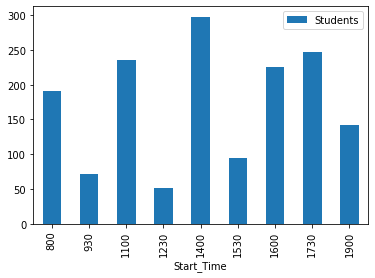

In [124]:
#plot total Student vs time
df_TTclasses.plot.bar(x='Start_Time', y = 'Students')
plot.show()